# SRAG 2021 and 2022 - Severe Acute Respiratory Syndrome Database - including COVID-19 data

## Libraries

In [30]:
import numpy as np
import pandas as pd
import io
import requests
from PIL import Image
import matplotlib.pyplot as plt

## Datasets

In [49]:
original_data_2022 = pd.read_csv("C:/Users/lucas/Desktop/Unicamp/IC/Projeto Charles/INFLUD22-26-09-2022.csv", delimiter=';', usecols = ['CS_SEXO','CS_RACA','SG_UF_NOT','UTI','RAIOX_RES','CS_ESCOL_N','CS_GESTANT','PUERPERA','CLASSI_FIN','VACINA_COV','CRITERIO','CARDIOPATI','RENAL','ASMA','DIABETES','HEMATOLOGI','SIND_DOWN','HEPATICA','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE','OBESIDADE','OUT_MORBI','EVOLUCAO','DT_COLETA','NU_IDADE_N','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA'])

original_data_2021 = pd.read_csv("C:/Users/lucas/Desktop/Unicamp/IC/Projeto Charles/INFLUD21-2021.csv", delimiter=';', usecols = ['CS_SEXO','CS_RACA','SG_UF_NOT','UTI','RAIOX_RES','CS_ESCOL_N','CS_GESTANT','PUERPERA','CLASSI_FIN','VACINA_COV','CRITERIO','CARDIOPATI','RENAL','ASMA','DIABETES','HEMATOLOGI','SIND_DOWN','HEPATICA','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE','OBESIDADE','OUT_MORBI','EVOLUCAO','DT_COLETA','NU_IDADE_N','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA'])

In [10]:
original_data_2022.shape

(447281, 38)

In [11]:
original_data_2021.shape

(1733517, 38)

In [31]:
data2022 = original_data_2022.copy(deep=True)
data2021 = original_data_2021.copy(deep=True)

In [13]:
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733517 entries, 0 to 1733516
Data columns (total 38 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SG_UF_NOT   object 
 1   CS_SEXO     object 
 2   NU_IDADE_N  int64  
 3   CS_GESTANT  int64  
 4   CS_RACA     int64  
 5   CS_ESCOL_N  float64
 6   FEBRE       float64
 7   TOSSE       float64
 8   GARGANTA    float64
 9   DISPNEIA    float64
 10  DESC_RESP   float64
 11  SATURACAO   float64
 12  DIARREIA    float64
 13  VOMITO      float64
 14  PUERPERA    float64
 15  CARDIOPATI  float64
 16  HEMATOLOGI  float64
 17  SIND_DOWN   float64
 18  HEPATICA    float64
 19  ASMA        float64
 20  DIABETES    float64
 21  NEUROLOGIC  float64
 22  PNEUMOPATI  float64
 23  IMUNODEPRE  float64
 24  RENAL       float64
 25  OBESIDADE   float64
 26  OUT_MORBI   float64
 27  UTI         float64
 28  RAIOX_RES   float64
 29  DT_COLETA   object 
 30  CLASSI_FIN  float64
 31  CRITERIO    float64
 32  EVOLUCAO    float64
 33  DOR_ABD

Percentage of missing data for each feature - 2021

In [14]:
(data2021.isnull().sum()/data2021.shape[0]*100).sort_values(ascending=False)

SIND_DOWN     66.808690
HEPATICA      66.807825
PUERPERA      66.702028
HEMATOLOGI    66.697183
IMUNODEPRE    66.365602
RENAL         66.113918
ASMA          65.970740
NEUROLOGIC    65.888134
PNEUMOPATI    65.864367
OBESIDADE     64.333664
DIABETES      59.295467
OUT_MORBI     58.725066
CARDIOPATI    56.064002
RAIOX_RES     42.634021
CS_ESCOL_N    35.349466
DOR_ABD       34.872401
PERD_PALA     34.121673
PERD_OLFT     34.086600
VOMITO        33.598401
DIARREIA      32.570203
GARGANTA      31.292453
FADIGA        30.629235
VACINA_COV    26.440641
DESC_RESP     20.290715
FEBRE         18.059644
SATURACAO     16.789913
UTI           13.661187
TOSSE         13.626345
DISPNEIA      13.100823
DT_COLETA      9.793097
EVOLUCAO       9.608790
CRITERIO       7.708145
CLASSI_FIN     5.160953
CS_SEXO        0.000000
CS_RACA        0.000000
CS_GESTANT     0.000000
NU_IDADE_N     0.000000
SG_UF_NOT      0.000000
dtype: float64

In [15]:
data2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447281 entries, 0 to 447280
Data columns (total 38 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SG_UF_NOT   447281 non-null  object 
 1   CS_SEXO     447281 non-null  object 
 2   NU_IDADE_N  447281 non-null  int64  
 3   CS_GESTANT  447281 non-null  int64  
 4   CS_RACA     447281 non-null  int64  
 5   CS_ESCOL_N  276723 non-null  float64
 6   FEBRE       355862 non-null  float64
 7   TOSSE       382409 non-null  float64
 8   GARGANTA    302555 non-null  float64
 9   DISPNEIA    366140 non-null  float64
 10  DESC_RESP   343035 non-null  float64
 11  SATURACAO   347937 non-null  float64
 12  DIARREIA    291999 non-null  float64
 13  VOMITO      294248 non-null  float64
 14  PUERPERA    150497 non-null  float64
 15  CARDIOPATI  192873 non-null  float64
 16  HEMATOLOGI  151519 non-null  float64
 17  SIND_DOWN   150907 non-null  float64
 18  HEPATICA    150762 non-null  float64
 19  AS

Percentage of missing data for each feature

In [16]:
(data2022.isnull().sum()/data2022.shape[0]*100).sort_values(ascending=False)

PUERPERA      66.352919
HEPATICA      66.293672
SIND_DOWN     66.261254
HEMATOLOGI    66.124427
OBESIDADE     65.800694
IMUNODEPRE    65.414136
RENAL         65.292959
ASMA          65.008798
PNEUMOPATI    64.681710
NEUROLOGIC    64.445393
DIABETES      60.174253
OUT_MORBI     58.088987
CARDIOPATI    56.878785
RAIOX_RES     42.272084
CS_ESCOL_N    38.132181
PERD_PALA     36.663306
PERD_OLFT     36.599587
DOR_ABD       35.657450
DIARREIA      34.716878
VOMITO        34.214062
FADIGA        33.178025
GARGANTA      32.356841
DESC_RESP     23.306601
SATURACAO     22.210646
FEBRE         20.438829
DISPNEIA      18.140945
UTI           15.675604
EVOLUCAO      15.431239
TOSSE         14.503634
CRITERIO      11.822098
CLASSI_FIN     9.227533
DT_COLETA      8.466490
VACINA_COV     0.106421
CS_SEXO        0.000000
CS_RACA        0.000000
CS_GESTANT     0.000000
NU_IDADE_N     0.000000
SG_UF_NOT      0.000000
dtype: float64

## Dataclean - 2021

In [ ]:
#replace NAN values with ignored values 
data2021['CLASSI_FIN'].fillna(4, inplace = True) 
data2021['CRITERIO'].fillna(0, inplace=True) 
data2021['CS_GESTANT'].replace([0], 9, inplace=True) 
data2021.fillna(9, inplace = True)

# Convert float columns to int
float_columns = data2021.select_dtypes(include='float').columns
data2021[float_columns] = data2021[float_columns].astype(int)

# creating new variable
data2021['GRAVIDEZ'] = np.where(data2021['CS_GESTANT'].isin([1, 2, 3, 4]), data2021['CS_GESTANT'], 0)
data2021.loc[data2021['PUERPERA'] == 1, 'GRAVIDEZ'] = 5 # Defining that puerperal women receive 5 in the dataset

# Correcting the date format
data2021.loc[:, 'DT_COLETA'] = pd.to_datetime(data2021['DT_COLETA'], format='%d/%m/%Y', errors='coerce')
data2021 = data2021.dropna(subset=['DT_COLETA']).reset_index(drop=True) # remove rows where the 'DT_COLETA' column has NaN values

In [33]:
# Filter the dataset - pregnant and postpartum women
data_temp2021 = data2021.loc[(data2021['GRAVIDEZ'] != 0)].copy()
data_temp2021.reset_index(inplace=True, drop=True)
data_temp2021.shape

(19831, 39)

In [34]:
# Filter the dataset - confirmed COVID cases
data_temp2021 = data_temp2021.loc[(data_temp2021['CLASSI_FIN'] == 5)] # CLASSI_FIN = 5 means that the pathogen is the covid
data_temp2021.reset_index(inplace=True, drop=True)
data_temp2021.shape

(11995, 39)

In [35]:
# Filter the dataset - confirmed laboratorial cases
data_temp2021 = data_temp2021.loc[(data_temp2021['CRITERIO'] == 1)] # CRITERIO = 1 means that the method was laboratorial
data_temp2021.reset_index(inplace=True, drop=True)
data_temp2021.shape

(11053, 39)

In [36]:
data_temp2021.describe()

,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,RAIOX_RES,CLASSI_FIN,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,GRAVIDEZ
count,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,...,11053.000000,11053.0,11053.0,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000
mean,31.154890,3.128381,3.323713,6.324346,2.478151,1.987877,3.432371,2.257849,2.758618,2.758618,...,6.900299,5.0,1.0,1.660816,3.868090,3.474079,3.683344,3.696553,4.707772,3.162852
std,9.284368,1.319651,2.567929,3.120720,2.698842,2.338608,3.099781,2.564533,2.908640,2.889414,...,2.266096,0.0,0.0,1.982766,3.188545,3.189086,3.178968,3.174646,3.565098,1.203388
min,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,6.000000,5.0,1.0,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,30.000000,3.000000,4.000000,9.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,6.000000,5.0,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
75%,36.000000,3.000000,4.000000,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,5.0,1.0,1.000000,9.000000,2.000000,9.000000,9.000000,9.000000,4.000000
max,103.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,5.0,1.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000


## Dataclean - 2022

In [ ]:
# Fill missing values with ignored values
data2022['CLASSI_FIN'].fillna(4, inplace=True)
data2022['CRITERIO'].fillna(0, inplace=True)
data2022['CS_GESTANT'].replace([0], 9, inplace=True)
data2022.fillna(9, inplace=True)

# Convert float columns to int
float_columns_2022 = data2022.select_dtypes(include='float').columns
data2022[float_columns_2022] = data2022[float_columns_2022].astype(int)

# Creating new variable
data2022['GRAVIDEZ'] = np.where(data2022['CS_GESTANT'].isin([1, 2, 3, 4]), data2022['CS_GESTANT'], 0)
data2022.loc[data2022['PUERPERA'] == 1, 'GRAVIDEZ'] = 5

data2022.loc[:, 'DT_COLETA'] = pd.to_datetime(data2022['DT_COLETA'], format='%d/%m/%Y', errors='coerce')
data2022 = data2022.dropna(subset=['DT_COLETA']).reset_index(drop=True) # remove rows where the 'DT_COLETA' column has NaN values

In [38]:
# Filter the dataset - pregnant and postpartum women
data_temp2022 = data2022.loc[(data2022['GRAVIDEZ'] != 0)].copy()
data_temp2022.reset_index(inplace=True, drop=True)
data_temp2022.shape

(6603, 39)

In [39]:
# Filter the dataset - confirmed COVID cases
data_temp2022 = data_temp2022.loc[(data_temp2022['CLASSI_FIN'] == 5)]
data_temp2022.reset_index(inplace=True, drop=True)
data_temp2022.shape

(4023, 39)

In [40]:
# Filter the dataset - confirmed laboratorial cases
data_temp2022 = data_temp2022.loc[(data_temp2022['CRITERIO'] == 1)]
data_temp2022.reset_index(inplace=True, drop=True)
data_temp2022.shape

(3806, 39)

In [41]:
data_temp2022.describe()

,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,RAIOX_RES,CLASSI_FIN,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,GRAVIDEZ
count,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,...,3806.000000,3806.0,3806.0,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000
mean,31.070678,3.308723,2.931161,6.146873,3.322386,2.811876,3.709932,3.745139,3.882817,4.041776,...,7.076984,5.0,1.0,1.555702,4.270100,4.132685,4.359958,4.381503,1.468471,3.323437
std,14.005499,1.354435,2.473086,3.206551,3.191951,3.023226,3.298061,3.312176,3.351260,3.350814,...,2.018081,0.0,0.0,1.964714,3.352068,3.374948,3.346831,3.350331,1.283445,1.211948
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,3.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,6.000000,5.0,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000
50%,28.000000,3.000000,2.000000,9.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,6.000000,5.0,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000
75%,34.000000,4.000000,4.000000,9.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,5.0,1.0,1.000000,9.000000,9.000000,9.000000,9.000000,2.000000,5.000000
max,101.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,5.0,1.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000


## Concatenating the two DataFrames 

In [42]:
data_pre = pd.concat([data_temp2021,data_temp2022],ignore_index=True)
df_concat = data_pre.drop_duplicates(keep=False) # Only 6 duplicate rows
df_concat.reset_index(inplace = True, drop = True)

In [43]:
display(df_concat)

,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,FEBRE,TOSSE,GARGANTA,DISPNEIA,...,DT_COLETA,CLASSI_FIN,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,GRAVIDEZ
0,TO,F,39,1,4,9,2,2,2,1,...,2021-01-09 00:00:00,5,1,2,2,1,2,2,2,1
1,AM,F,29,5,4,3,1,1,9,1,...,2021-01-08 00:00:00,5,1,2,9,9,9,9,9,5
2,SP,F,59,5,1,9,2,2,2,1,...,2021-01-19 00:00:00,5,1,1,2,2,2,2,9,5
3,MG,F,29,2,2,9,1,1,2,1,...,2021-02-01 00:00:00,5,1,1,1,1,2,2,9,2
4,RO,F,30,2,4,3,1,1,2,2,...,2021-02-08 00:00:00,5,1,9,2,2,2,2,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14848,DF,F,42,5,9,9,2,2,2,2,...,2022-03-04 00:00:00,5,1,1,2,2,2,2,2,5
14849,MT,F,26,5,4,9,1,1,9,9,...,2022-06-13 00:00:00,5,1,1,9,9,9,9,1,5
14850,SE,M,66,6,9,9,1,2,2,1,...,2022-07-13 00:00:00,5,1,3,2,2,2,2,1,5
14851,SP,F,26,3,4,3,2,1,1,2,...,2022-06-17 00:00:00,5,1,1,2,2,2,2,1,3


*We considered the VOCs predominance period for:*

- Gama P.1 (March 2021 to Jul 2021);

- Delta AY (Sept 2021 November 2021);

- Omicrom BA (January 2022 aug 2022).



In [44]:
# Ensure 'DT_COLETA' column is of type Timestamp
df_concat['DT_COLETA'] = pd.to_datetime(df_concat['DT_COLETA'])

# Creating datasets that separate the variants
selecao_gama = (df_concat['DT_COLETA'] >= pd.to_datetime('2021-03-01')) & (df_concat['DT_COLETA'] <= pd.to_datetime('2021-07-30'))
selecao_delta = (df_concat['DT_COLETA'] >= pd.to_datetime('2021-09-01')) & (df_concat['DT_COLETA'] <= pd.to_datetime('2021-11-30'))
selecao_omicrom = (df_concat['DT_COLETA'] >= pd.to_datetime('2022-01-01')) & (df_concat['DT_COLETA'] <= pd.to_datetime('2022-08-30'))

df_selection_gamma = df_concat[selecao_gama]
df_selection_delta = df_concat[selecao_delta]
df_selection_omicron = df_concat[selecao_omicrom]

# Creating a COVID variant variable
df_concat['VARIANTE_COVID'] = 0
df_concat.loc[selecao_gama, 'VARIANTE_COVID'] = 1 # 1 for gamma
df_concat.loc[selecao_delta, 'VARIANTE_COVID'] = 2 # 2 for delta
df_concat.loc[selecao_omicrom, 'VARIANTE_COVID'] = 3 # 3 for omicron

df_concat = df_concat.loc[(df_concat['VARIANTE_COVID'] != 0)] # excluding other periods
df_concat.reset_index(inplace=True, drop=True)

In [45]:
print("Gamma sample: ", df_selection_gamma.shape)
print("Delta sample: ", df_selection_delta.shape)
print("Omicron sample: ", df_selection_omicron.shape)
print("Number of pregnant women: ", df_concat['GRAVIDEZ'].value_counts()[1] + df_concat['GRAVIDEZ'].value_counts()[2] + df_concat['GRAVIDEZ'].value_counts()[3] + df_concat['GRAVIDEZ'].value_counts()[4])
print("Number of postpartum women: ", df_concat['GRAVIDEZ'].value_counts()[5])
print()
print("Final size of the dataframe: ", df_concat.shape)
print()

Gamma sample:  (8117, 39)
Delta sample:  (695, 39)
Omicron sample:  (3909, 39)
Number of pregnant women:  9544
Number of postpartum women:  3177

Final size of the dataframe:  (12721, 40)



Flowchart

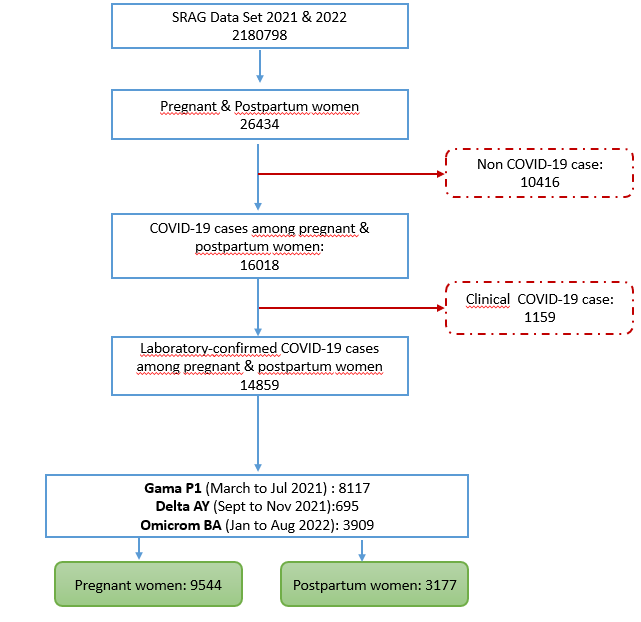

In [46]:
# creating a object
im = Image.open("Data\Flowchart.png")

display(im)

## Merge datasets to obtain region names

In [47]:
# Data URL (CSV file)
url = 'https://raw.githubusercontent.com/chandez/Estados-Cidades-IBGE/master/csv/estados.csv'

# Execute protocol to request data from a CSV file on the internet.
s = requests.get(url).content
file_name = io.StringIO(s.decode('utf-8'))
dm = pd.read_csv(url)

# Extracting the first 'table'
dm['Regiao_nome'] = dm['Regiao'] * 0
region_list = dm['Regiao'].tolist()

# Creating a mapping dictionary for region names
region_mapping = {1: 'North', 2: 'Northeast', 3: 'Southeast', 4: 'South', 5: 'Midwest'}

# Mapping the region names based on the 'Region' column
dm['Regiao_nome'] = dm['Regiao'].map(region_mapping)

dm = dm.drop(columns=['Nome', 'Id', 'CodigoUf'])
dm = dm.rename(columns={'Uf': 'SG_UF_NOT'})
df = df_concat.merge(dm, how='left', on='SG_UF_NOT')

lista_regiao_nome = df['Regiao_nome'].tolist()

## Histograms

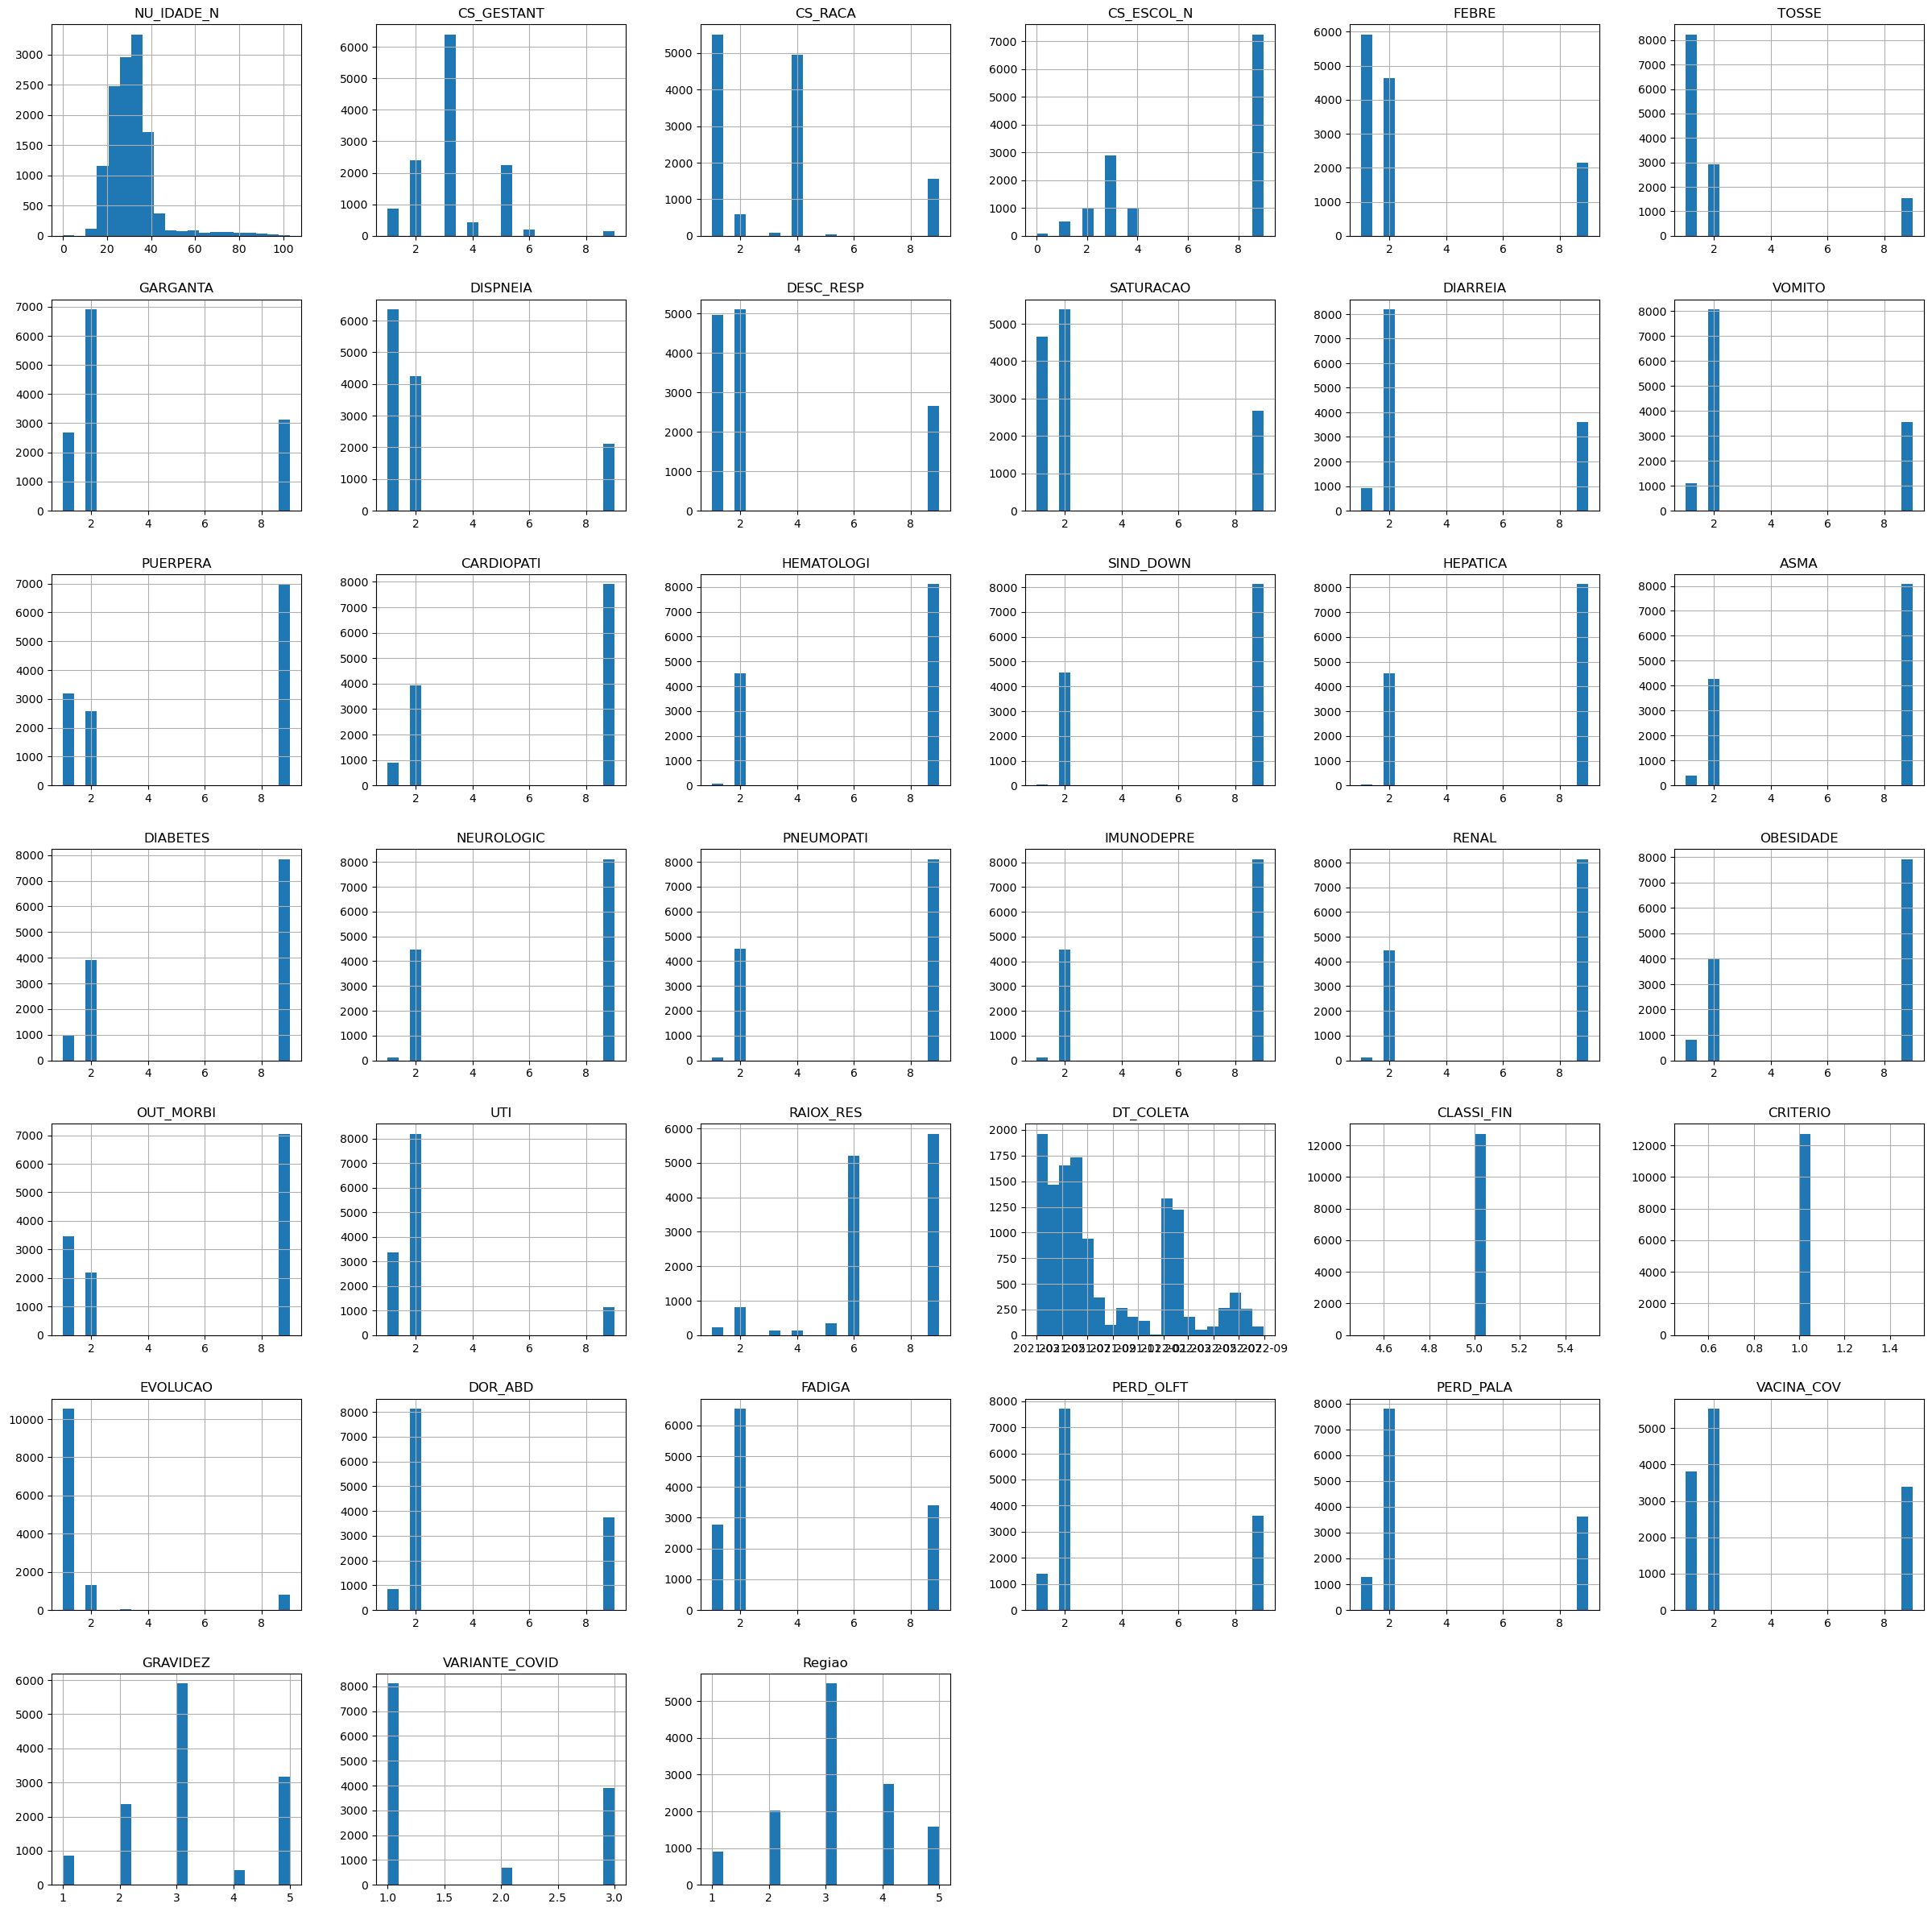

In [30]:
df[list(df.columns)].hist(bins=20, figsize=(30, 30))
plt.show()

## Save file

In [31]:
df.to_csv('data/df_preprocessed.csv')

In [35]:
df['VARIANTE_COVID'].value_counts()

VARIANTE_COVID
1    8117
3    3909
2     695
Name: count, dtype: int64